# Praktikum 4 Liebenow

### <u>Numerische Berechnung der FT</u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Erstellung des Sinus-Signals $f(t)=sin(2 \pi ft)+2$ :

In [2]:
n=1024
f=150
omega=2*np.pi*f
t_start=0
t_end=1
t=np.linspace(t_start,t_end,n)
f_t=np.sin(omega*t)+2

#### Erstellung des Rechteck-Signals $r(t)=2\Pi(t-T)$ mit $T=8$:

In [3]:
n2=1024
T=8
amp=2
rect_t=np.zeros(n2)
t_start=-4
t_end=16
t_rect=np.linspace(t_start,t_end,n2)
for i in range(0,n2):
       if t_rect[i]>=T-T/2 and t_rect[i]<=T+T/2:
           rect_t[i]=amp

In [4]:
def makeFK(X_f,Fsample):
    N=X_f.size
    fk_Axis=np.zeros(N)
    for k in range(N):
        fk_Axis[k]=(k/N)*Fsample
    return fk_Axis

#### Numerische Funktion für die Stammfunktion aus Praktikum 3:

In [5]:
def stamm(f,start, end):
    N=f.size
    dt=(end-start)/N
    F=np.zeros(N,dtype=complex)
    F[0]=f[0]*dt
    for k in range(1,N):
        F[k]=(F[k-1]+f[k-1]*dt)
    return F

#### Zum Vergleich die FFT von Numpy:

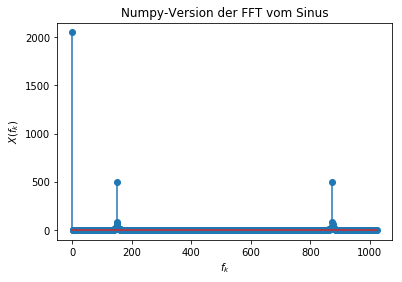

In [6]:
FFt_f_t=np.fft.fft(f_t)
plt.stem(abs(FFt_f_t))
plt.title("Numpy-Version der FFT vom Sinus")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$");

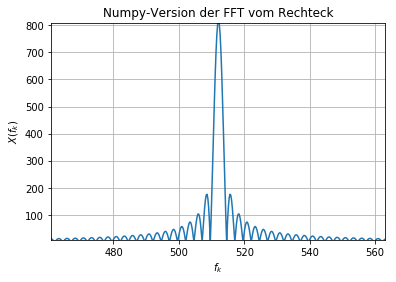

In [7]:
FFt_rect_t=np.fft.fft(rect_t,4096)
FT2=np.fft.fftshift(FFt_rect_t)
plt.margins(x=-0.45,y=-0.01)
plt.plot(np.linspace(0,1024,4096),abs(FT2))
plt.title("Numpy-Version der FFT vom Rechteck")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$")
plt.grid(True);

#### Erstellung der Funktion für die numerische FFT: (Ordnung 1024)

In [8]:
def fourier(x_t,t,fmax):
    N=len(x_t)
    steps=1024
    frq=np.linspace(-fmax,fmax,steps)
    FOU=np.zeros(frq.size,dtype=complex)
    for f in range (steps):    
        exp=np.exp(-1j*2*frq[f]*np.pi*t)
        huhu=sum(stamm(x_t*exp,-1,1))
        FOU[f]=huhu
    return FOU


* der Parameter fmax wurde eingefügt, da die 150 Hz des Sinus-Signals und die 8 Sekunden des Rechtecks schwer mit einer einzigen Abtastfrequenz transformiert werden können ohne Theoreme zu verletzen!

#### Darstellung der FFT mit der numerischen Berechnung:

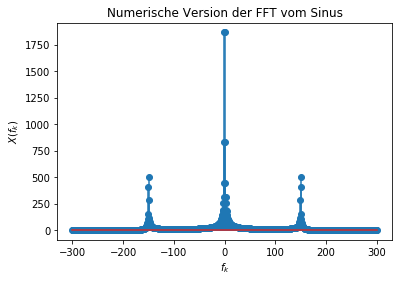

In [9]:
FOU_f_t=fourier(f_t,t,300)
plt.stem(np.linspace(-300,300,1024),abs(FOU_f_t))
plt.title("Numerische Version der FFT vom Sinus")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$");

* Die Werte und Frequenzen, sowie der Gleichanteil werden augenscheinlich korrekt berechnet.
* Die Flanken entstehen durch die Begrenzung des Zeitbereiches. Die Begrenzung des Sinus gleicht einer Multiplikation mit einem Rechteck und daher ist ein wenig die Charakteristik der SI-Funktion bei jedem Peak zu erkennen!

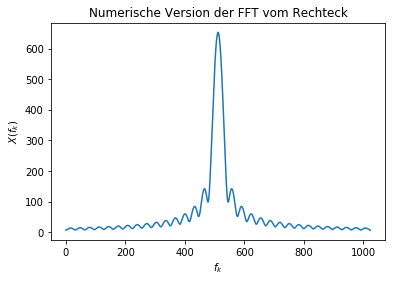

In [10]:
fk=makeFK(rect_t,n2)
FOU_rect_t=fourier(rect_t,t_rect,2)
plt.plot(fk,abs(FOU_rect_t))
plt.title("Numerische Version der FFT vom Rechteck")
plt.xlabel("$f_k$")
plt.ylabel("$X(f_k)$");

* Die Abweichungen zur Numpy-Variante liegen vermutlich in dem Zusammenspiel der Abtastfrequenz, der Ordnung und dem Zeitbereich 
* Die Form der Kurve entspricht größtenteils dem Erwarteten, jedoch habe ich keinen Lösungsansatz gefunden, der die Werte korreckt berechnet (Amplitude) oder die einzelnen Wellentäler bis zur Null zeichnet.